In [70]:
# Advanced Statistical Analysis Of Apple Inc. Stock Data
import pandas as pd
import numpy as np

apple_stock_price = pd.read_csv('/Users/patash/PSTB/Week_3/day_4/Apple_Stock_ Prices.csv')
print(apple_stock_price.head())

# 7 variables: Date, Open, High, Low, Close, Adj Close, Volume. 

         Date      Open      High       Low     Close  Adj Close    Volume
0  02/01/1981  0.154018  0.155134  0.154018  0.154018   0.119849  21660800
1  05/01/1981  0.151228  0.151228  0.150670  0.150670   0.117244  35728000
2  06/01/1981  0.144531  0.144531  0.143973  0.143973   0.112032  45158400
3  07/01/1981  0.138393  0.138393  0.137835  0.137835   0.107256  55686400
4  08/01/1981  0.135603  0.135603  0.135045  0.135045   0.105085  39827200


In [71]:
# EDA
apple_stock_price.info()

# Pas de valeurs manquantes. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10608 entries, 0 to 10607
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10608 non-null  object 
 1   Open       10608 non-null  float64
 2   High       10608 non-null  float64
 3   Low        10608 non-null  float64
 4   Close      10608 non-null  float64
 5   Adj Close  10608 non-null  float64
 6   Volume     10608 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 580.3+ KB


In [72]:
# Convertir 'time' en datetime
apple_stock_price['Date'] = pd.to_datetime(apple_stock_price['Date'], format='%d/%m/%Y')
print(apple_stock_price['Date'].dtype)
apple_stock_price.head()

datetime64[ns]


,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [73]:
# Tri par date
apple_stock_price = apple_stock_price.sort_values(by='Date')
apple_stock_price.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,1981-01-05,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,1981-01-06,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,1981-01-07,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,1981-01-08,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


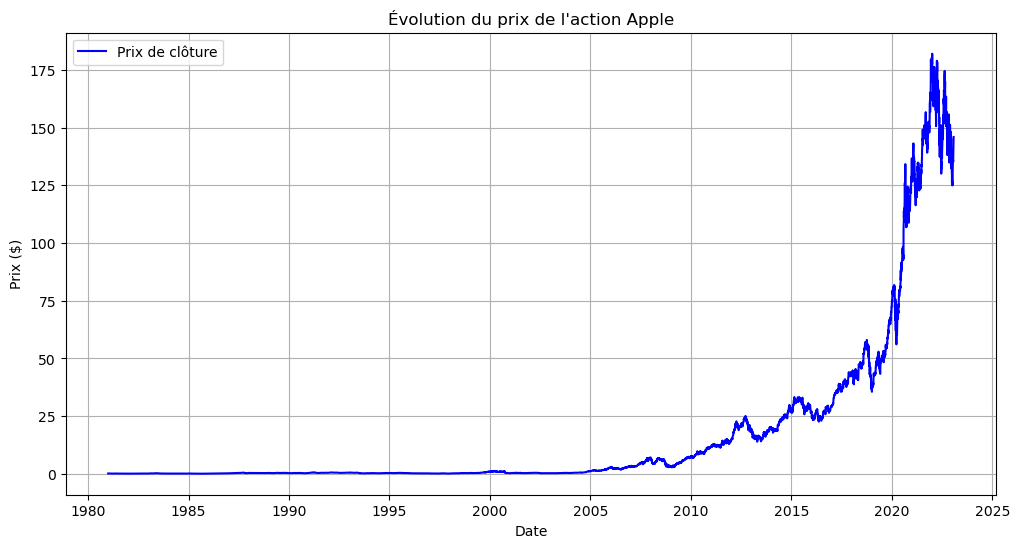

In [74]:
# Visualiser 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(apple_stock_price['Date'], apple_stock_price['Close'], label='Prix de clôture', color='blue')
plt.xlabel('Date')
plt.ylabel('Prix ($)')
plt.title("Évolution du prix de l'action Apple")
plt.legend()
plt.grid(True)
plt.show()

# Sur le graphique ci-dessous, on peut voir que la tendance haussière est apparue en 2007 après la présentation du premier iPhone. 
# Donc, pour mieux capturer la tendance et les cycles, nous allons analyser l'évolution des prix à partir de janvier 2007.

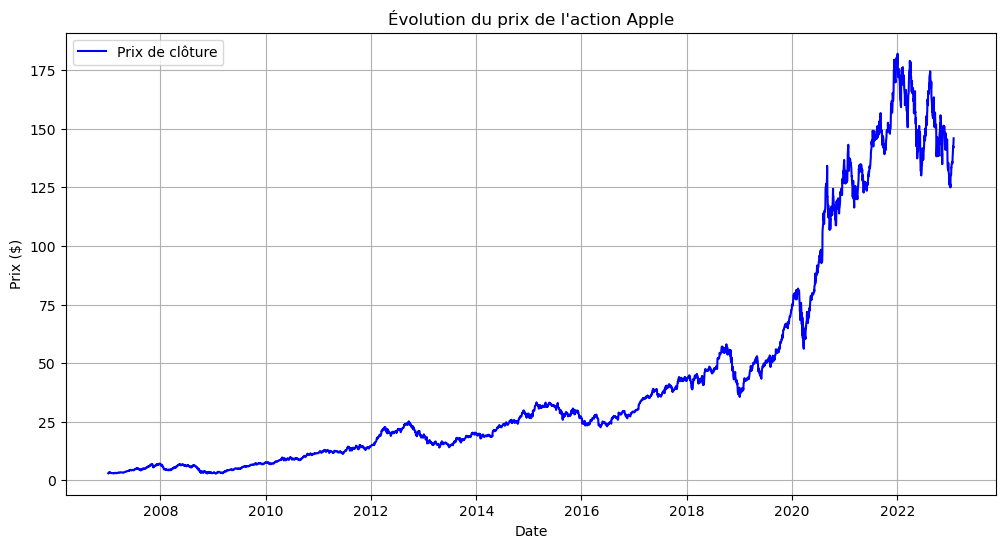

In [75]:
# DataFrame à partir de 2007
filtered_data = apple_stock_price[apple_stock_price['Date'] >= '2007-01-01']

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Prix de clôture', color='blue')
plt.xlabel('Date')
plt.ylabel('Prix ($)')
plt.title("Évolution du prix de l'action Apple")
plt.legend()
plt.grid(True)
plt.show()

/var/folders/0x/ld7nmr854gg9f09bct0w9drh0000gn/T/ipykernel_31927/1719214448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['Date'].dt.year
/var/folders/0x/ld7nmr854gg9f09bct0w9drh0000gn/T/ipykernel_31927/1719214448.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Close', data=filtered_data, palette='Blues')


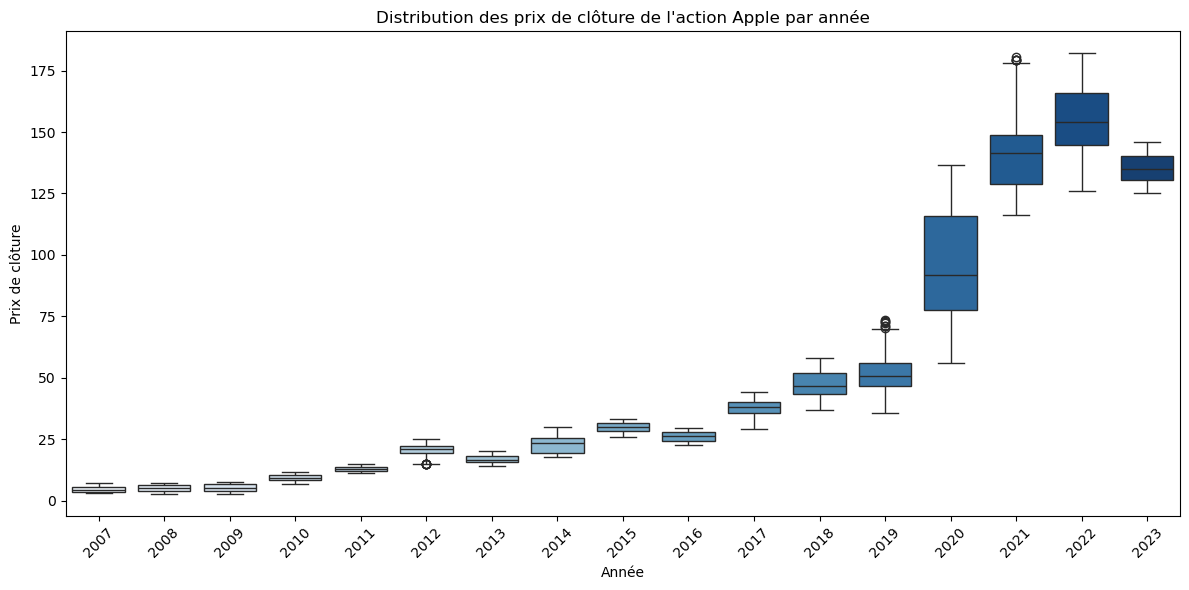

In [76]:
# Boxplots par année - distribution

filtered_data['Year'] = filtered_data['Date'].dt.year

plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Close', data=filtered_data, palette='Blues')

plt.xlabel('Année')
plt.ylabel('Prix de clôture')
plt.title('Distribution des prix de clôture de l\'action Apple par année')
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

# Les boxplots nous montrent qu'il y a une tendance haussière stable.
# La forte croissance des prix a commencé en 2019 et s'est poursuivie jusqu'en 2022. 
# En 2023, le prix a connu une légère correction.

In [77]:

# Statistiques descriptives 

boxplot_stats = filtered_data.groupby('Year')['Close'].describe()[['min', '25%', '50%', '75%', 'max']]
boxplot_stats.columns = ['Min', 'Q1 (25%)', 'Médiane (50%)', 'Q3 (75%)', 'Max']

print(boxplot_stats)


             Min    Q1 (25%)  Médiane (50%)    Q3 (75%)         Max
Year                                                               
2007    2.973929    3.346429       4.425000    5.548929    7.136786
2008    2.874643    3.963929       5.299286    6.187857    6.961786
2009    2.792857    4.086696       5.085178    6.629643    7.558571
2010    6.858929    8.475447       9.180893   10.321518   11.623929
2011   11.261429   12.222054      12.750893   13.862500   15.080000
2012   14.686786   19.244375      20.803215   22.050804   25.075001
2013   13.947500   15.635803      16.466964   18.039285   20.360357
2014   17.849285   19.421875      23.475001   25.281249   29.750000
2015   25.780001   28.343125      30.075000   31.728126   33.250000
2016   22.584999   24.284375      26.437500   27.744375   29.562500
2017   29.004999   35.453750      38.185001   39.963751   44.105000
2018   36.707500   43.285000      46.512501   51.940000   58.017502
2019   35.547501   46.504999      50.753749   55

In [78]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4046 entries, 6562 to 10607
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4046 non-null   datetime64[ns]
 1   Open       4046 non-null   float64       
 2   High       4046 non-null   float64       
 3   Low        4046 non-null   float64       
 4   Close      4046 non-null   float64       
 5   Adj Close  4046 non-null   float64       
 6   Volume     4046 non-null   int64         
 7   Year       4046 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(1)
memory usage: 268.7 KB


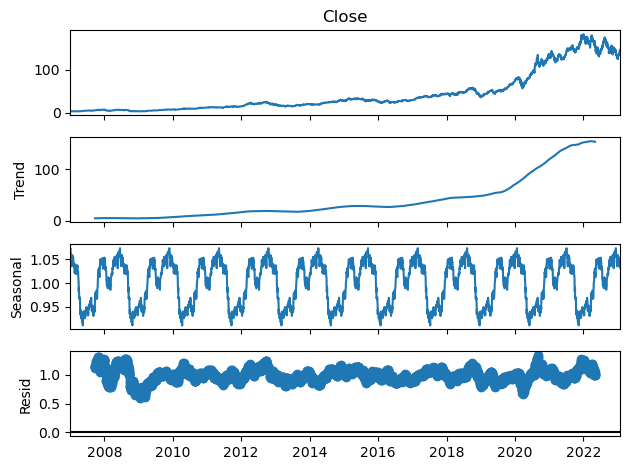

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

filtered_data.set_index('Date', inplace=True)

# Décomposer la série temporelle
decomposition = seasonal_decompose(filtered_data['Close'], model='multiplicative', period=365)

# Afficher les composantes de la décomposition
decomposition.plot()
plt.tight_layout()
plt.show()

# Le graphique de décomposition montre une tendance haussière et des cycles clairs.

In [ ]:
correlation_matrix = filtered_data[['Close', 'Volume']].corr()
print(correlation_matrix)

# La matrice de corrélation signifie que quand le volume de transaction augmente:
# le prix boursier baisse. 

           Close    Volume
Close   1.000000 -0.510112
Volume -0.510112  1.000000


In [94]:
import statsmodels.api as sm
X = filtered_data['Volume']  
y = filtered_data['Close']  
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     1422.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          5.28e-267
Time:                        14:57:29   Log-Likelihood:                -20680.
No. Observations:                4046   AIC:                         4.136e+04
Df Residuals:                    4044   BIC:                         4.138e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.9034      0.894     74.849      0.0

In [ ]:
from scipy import stats

data_2022 = filtered_data[filtered_data.index.year == 2022]

# Créer deux sous-ensembles : janvier-juin et juillet-décembre
jan_jun = data_2022[data_2022.index.month <= 6]['Close']  # Janvier - Juin
jul_dec = data_2022[data_2022.index.month > 6]['Close']   # Juillet - Décembre

# Afficher les deux sous-ensembles pour vérification
print(jan_jun.head())
print(jul_dec.head())

# Effectuer un t-test pour comparer les deux périodes
t_stat, p_value = stats.ttest_ind(jan_jun, jul_dec)

# Afficher les résultats du t-test
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# P-value < 0,05 : il existe une différence significative entre le prix moyen du premier 
# et du deuxième semestre de l'année.

Date
2022-01-03    182.009995
2022-01-04    179.699997
2022-01-05    174.919998
2022-01-06    172.000000
2022-01-07    172.169998
Name: Close, dtype: float64
Date
2022-07-01    138.929993
2022-07-05    141.559998
2022-07-06    142.919998
2022-07-07    146.350006
2022-07-08    147.039993
Name: Close, dtype: float64
T-statistic: 6.415228406998787
P-value: 7.029885789833756e-10


In [89]:
# Rendement annuel Apple

# Calculer le prix de clôture au début et à la fin de chaque année
annual_data = filtered_data.groupby('Year').agg(
    start_price=('Close', 'first'), 
    end_price=('Close', 'last')     
).reset_index()

annual_data['annual_return'] = (annual_data['end_price'] - annual_data['start_price']) / annual_data['start_price'] * 100

annual_data


,Year,start_price,end_price,annual_return
0,2007,2.992857,7.074286,136.372336
1,2008,6.958571,3.048214,-56.194828
2,2009,3.241071,7.526071,132.209384
3,2010,7.643214,11.520000,50.721935
4,2011,11.770357,14.464286,22.887403
5,2012,14.686786,19.006071,29.409328
6,2013,19.608213,20.036428,2.183855
7,2014,19.754642,27.594999,39.688682
8,2015,27.332500,26.315001,-3.722671
9,2016,26.337500,28.955000,9.938301


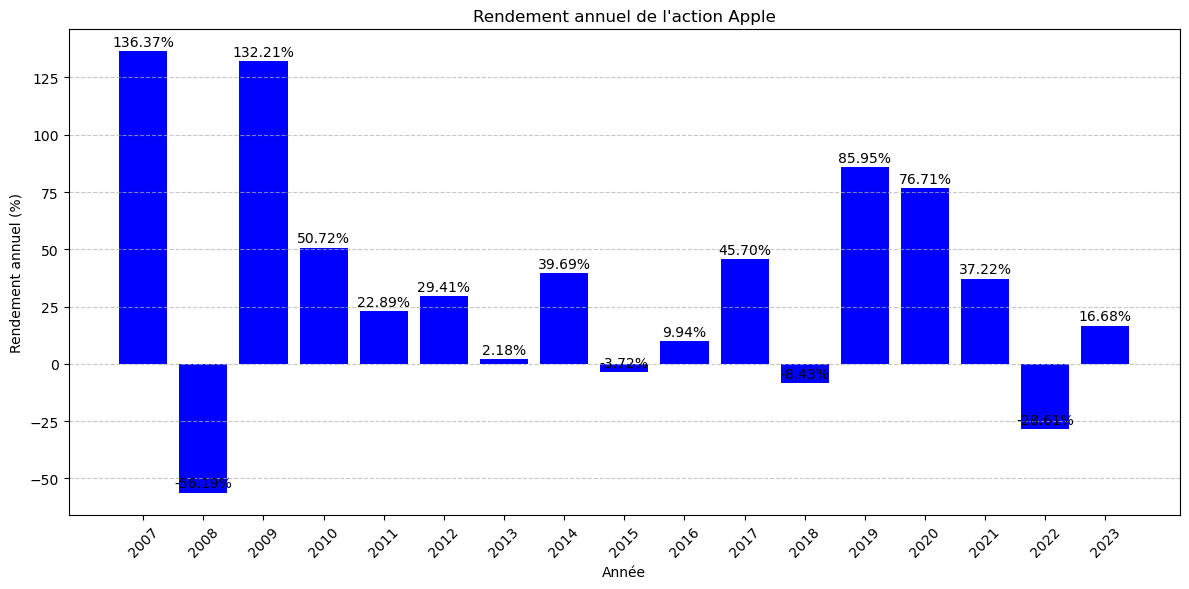

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(annual_data['Year'], annual_data['annual_return'], color='blue', width=0.8)

# Ajouter les valeurs en % sur les barres
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1,  
             f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)  
    
plt.xlabel('Année')
plt.ylabel('Rendement annuel (%)')
plt.title("Rendement annuel de l'action Apple")
plt.xticks(annual_data['Year'], rotation=45)  
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 

plt.show()